In [12]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Loading in the data

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 It is important to analyze the data. From the head, we can notice a few things. The PassengerId and ticket are unimportant. We can remove them. We also notice null values that we must later impute.  

#### Analyze the data through plotting

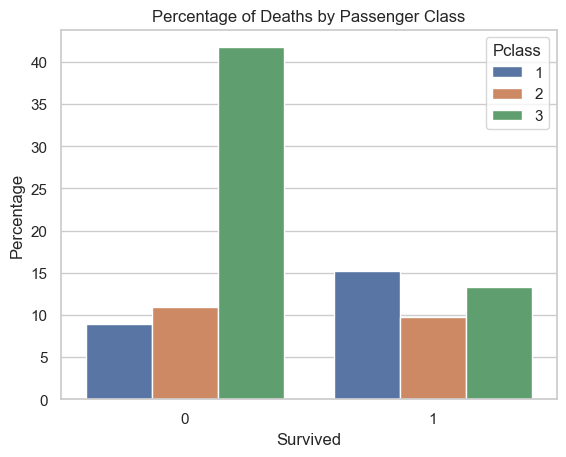

In [37]:
# Pclass vs survived
total_passengers = len(df)
passenger_percentage = df.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')
passenger_percentage['Percentage'] = (passenger_percentage['Count'] / total_passengers) * 100

# Plot the bar graph using seaborn
sns.barplot(x="Survived", y= "Percentage", hue="Pclass", data=passenger_percentage)
plt.title("Percentage of Deaths by Passenger Class")
plt.show()

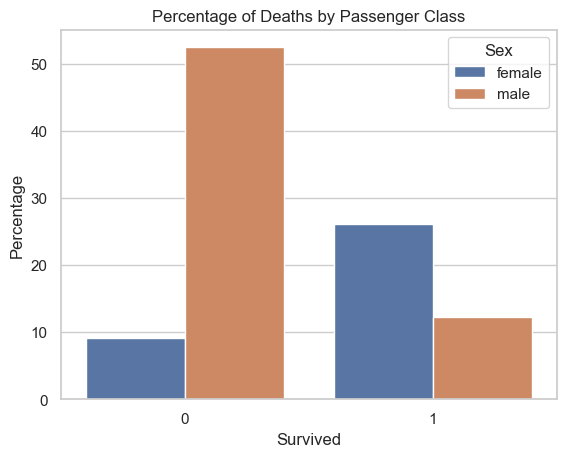

In [43]:
# Plot male vs female survival rate
passenger_percentage = df.groupby(['Survived', 'Sex']).size().reset_index(name='Count')
passenger_percentage['Percentage'] = (passenger_percentage['Count'] / total_passengers) * 100

# Plot the bar graph using seaborn
sns.barplot(x="Survived", y= "Percentage", hue="Sex", data=passenger_percentage)
plt.title("Percentage of Deaths by Sex")
plt.show()

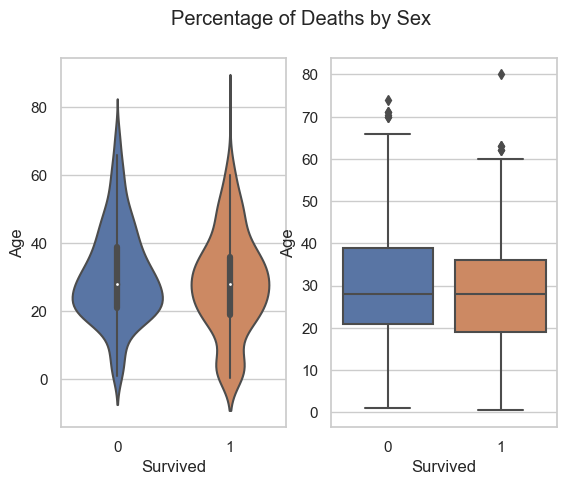

In [54]:
# Plot survival by age
fig, axes = plt.subplots(1, 2)
sns.violinplot(ax = axes[0], data=df, x="Survived", y="Age")
sns.boxplot(ax=axes[1], data=df, x="Survived", y="Age")
fig.suptitle("Percentage of Deaths by Age")



<Axes: xlabel='Sex', ylabel='Percent'>

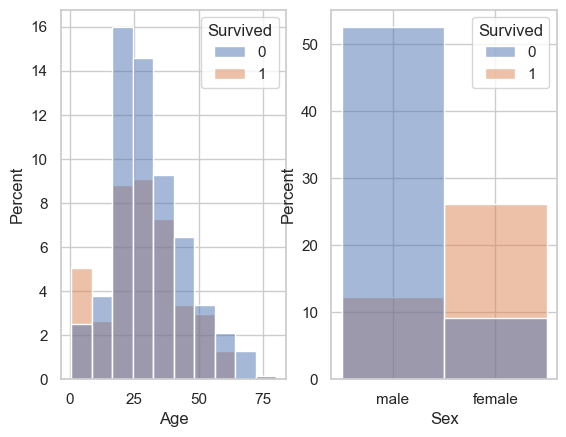

In [70]:
# Plot survival by age and gender
fig, axes = plt.subplots(1, 2)
sns.histplot(ax = axes[0], data=df, x="Age", hue="Survived", stat="percent", bins = 10)
sns.histplot(ax = axes[1], data=df, x="Sex", hue="Survived", stat="percent", bins = 10)

Text(0.5, 1.0, 'Embarked vs Survived')

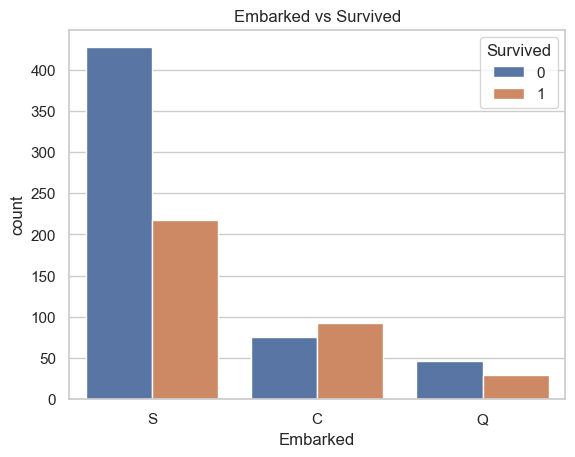

In [81]:

sns.countplot(x="Embarked", hue="Survived", data=df)
axes[0].set_title("Count of Survivors by Embarked")
axes[0].legend(title="Survived", labels=["No", "Yes"])
plt.title("Embarked vs Survived")